# Qcodes example with Rohde Schwarz ZNB20/8

In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
import qcodes as qc

In [2]:
import qcodes.instrument_drivers.rohde_schwarz.ZNB as ZNB
from qcodes.instrument_drivers.rohde_schwarz.ZNB import ZNBChannel

In [3]:
from qcodes.dataset.database import initialise_database
from qcodes.dataset.experiment_container import load_or_create_experiment
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id
initialise_database()
load_or_create_experiment(experiment_name='test_with_znb8',
                          sample_name="no sample")

test_with_znb8#no sample#4@C:\Users\jenielse\source\repos\qcodes_generate_test_db\qcplotbenchmark.db
----------------------------------------------------------------------------------------------------

The driver supports three ways of interacting with the instrument. We go through all of them here in order.

## Remotely setup VNA channels

By default the VNA driver will clear any traces and channels defined on the VNA and create a new channel for each of the S parameters available on the VNA. I.e. S11, S12, S21 and S22 for a 2 port VNA. In this mode the VNA also starts up with RF power turned off.

In [4]:
vna = ZNB.ZNB('VNA', 'TCPIP0::192.168.15.104::inst0::INSTR')
station = qc.Station(vna)

Connected to: Rohde-Schwarz ZNB8-4Port (serial:1311601044103158, firmware:2.86) in 0.72s


To use the VNA we likely want to turn on RF Power, which is off by default for safty in this driver. The driver default to low power but for safety lets set it to -50 dBm. The rf can be turned on and off globally and the power adjusted individually for each channel.

In [5]:
vna.channels.power(-50)
vna.rf_on()

As we have turned on rf power it's likely that the display output is out of scale so lets force a autoscale for all channels

In [6]:
vna.channels.autoscale()

The QCoDes driver for the Rohde Schwarz ZNB(8/20) is setup with num_ports*num_ports channels each containing one trace and reprecenting the standard S parameters (S11, S12, S21, S22 etc). For each S parameter you can define a frequency sweep and the power of the rf source i.e if we want to sweep from 100 KHz to 6 MHz in 100 steps measureing S11:

In [7]:
vna.channels.S11.start(100e3)
vna.channels.S11.stop(6e6)
vna.channels.S11.npts(100)

With a power of -30 dBm

In [8]:
vna.channels.S11.power(-30)

Now we can meassure a frequency trace, first remembering to turn on the rf source. By default this produces a dB magnitude scan.

In [9]:
vna.rf_on()
meas = Measurement()
meas.register_parameter(vna.channels.S11.trace)
with meas.run() as datasaver:
    get_v = vna.channels.S11.trace.get()
    datasaver.add_result((vna.channels.S11.trace, get_v))

Starting experimental run with id: 62


<IPython.core.display.Javascript object>


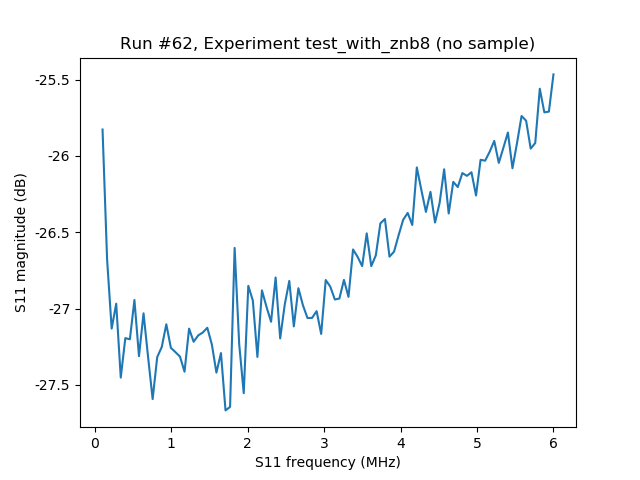

In [10]:
ax, cbax = plot_by_id(datasaver.run_id)

We can also define a frequency trace by setting the span and center frequency. Here as a 200 KHz windows centered around 1 MHZ

In [11]:
vna.channels.S11.span(200e3)
vna.channels.S11.center(1e6)
vna.channels.S11.npts(100)

Starting experimental run with id: 63


<IPython.core.display.Javascript object>


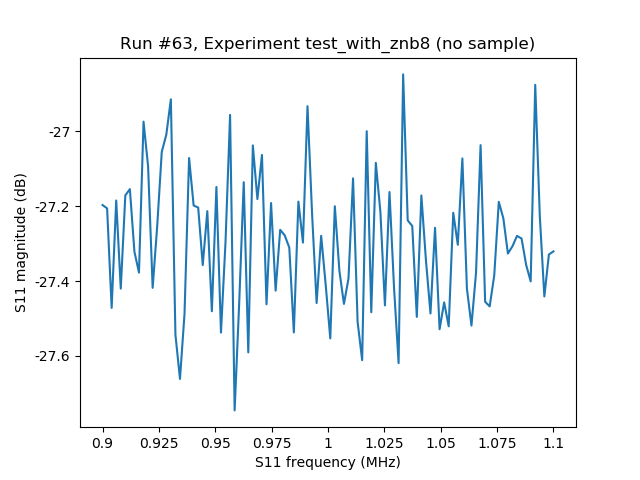

In [12]:
vna.rf_on()
meas = Measurement()
meas.register_parameter(vna.channels.S11.trace)
with meas.run() as datasaver:
    get_v = vna.channels.S11.trace.get()
    datasaver.add_result((vna.channels.S11.trace, get_v))
ax, cbax = plot_by_id(datasaver.run_id)

We can also measure the linear magniture.

Starting experimental run with id: 64


<IPython.core.display.Javascript object>


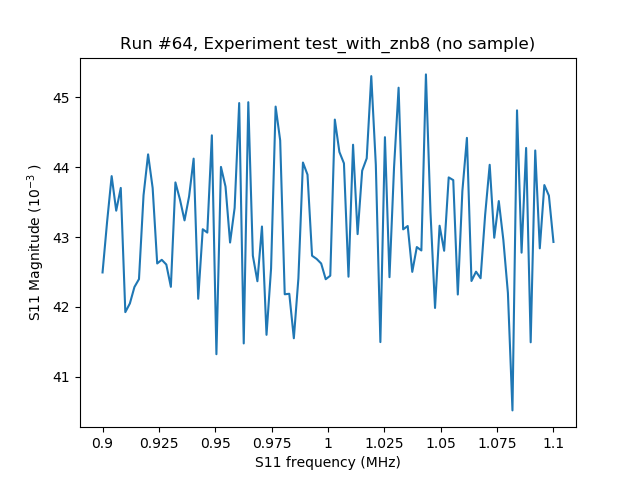

In [13]:
vna.rf_on()
vna.channels.S11.format('Linear Magnitude')
meas = Measurement()
meas.register_parameter(vna.channels.S11.trace)
with meas.run() as datasaver:
    get_v = vna.channels.S11.trace.get()
    datasaver.add_result((vna.channels.S11.trace, get_v))
ax, cbax = plot_by_id(datasaver.run_id)

Or the real part

Starting experimental run with id: 65


<IPython.core.display.Javascript object>


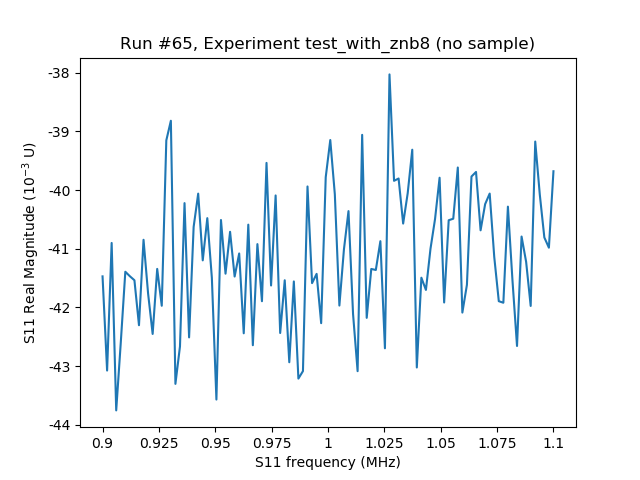

In [14]:
vna.rf_on()
vna.channels.S11.format('Real')
meas = Measurement()
meas.register_parameter(vna.channels.S11.trace)
with meas.run() as datasaver:
    get_v = vna.channels.S11.trace.get()
    datasaver.add_result((vna.channels.S11.trace, get_v))
ax, cbax = plot_by_id(datasaver.run_id)

Or imaginary

Starting experimental run with id: 66


<IPython.core.display.Javascript object>


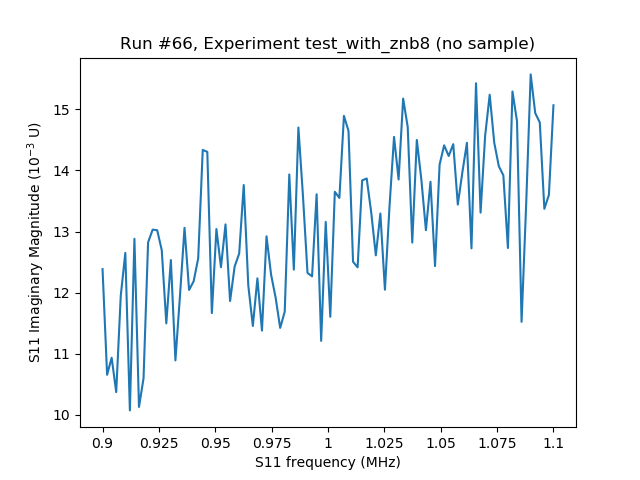

In [15]:
vna.rf_on()
vna.channels.S11.format('Imaginary')
meas = Measurement()
meas.register_parameter(vna.channels.S11.trace)
with meas.run() as datasaver:
    get_v = vna.channels.S11.trace.get()
    datasaver.add_result((vna.channels.S11.trace, get_v))
ax, cbax = plot_by_id(datasaver.run_id)

However, the QCoDeS dataset does not currently support complex number so if you want to capture both the magnitude and phase you should use `trace_mag_phase` which returns magnitude and phase as two arrays

In [16]:
# First set format back for consistency
vna.channels.S11.format('dB')

Starting experimental run with id: 67


<IPython.core.display.Javascript object>


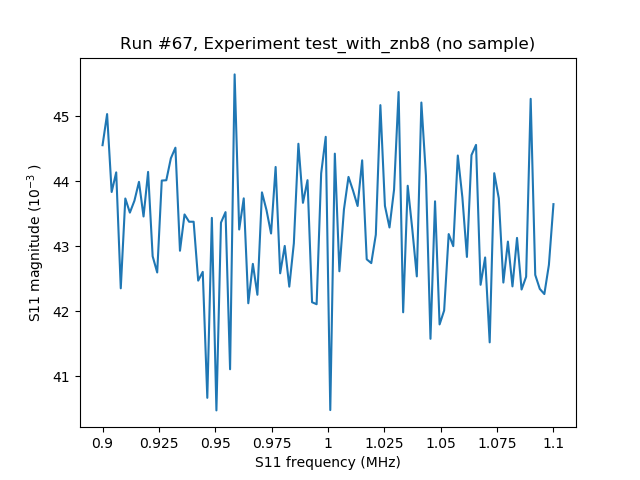

<IPython.core.display.Javascript object>


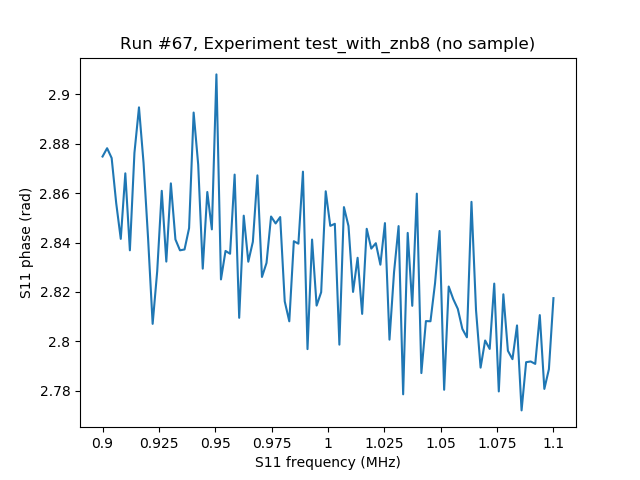

In [17]:
vna.rf_on()
meas = Measurement()
meas.register_parameter(vna.channels.S11.trace_mag_phase)
with meas.run() as datasaver:
    get_v = vna.channels.S11.trace_mag_phase.get()
    datasaver.add_result((vna.channels.S11.trace_mag_phase, get_v))
ax, cbax = plot_by_id(datasaver.run_id)

A number of methods exists to help setup the VNA

We can display all 4/16 ... S parameters in a split view on the VNA display.

In [18]:
vna.display_sij_split()

Or we can display all parameters in one view.

In [19]:
vna.display_single_window()

Or a grid of our own choice

In [20]:
vna.display_grid(2,1)

In [21]:
vna.display_sij_split()

It is possible to switch the display of traces on and off

In [22]:
vna.update_display_off()

In [23]:
vna.update_display_on()

Control if data should be captured continiously when not capturing traces

In [24]:
vna.cont_meas_off()

In [25]:
vna.cont_meas_on()

And switch the rf output on and off

In [26]:
vna.rf_on()

In [27]:
vna.rf_off()

Doing a 2D sweep is supported too

In [28]:
vna.rf_on()
vna.channels.S11.start(100e3)
vna.channels.S11.stop(200e3)
vna.channels.S11.npts(100)
vna.channels.S11.avg(10)

In [29]:
meas = Measurement()
meas.register_parameter(vna.channels.S11.power)
meas.register_parameter(vna.channels.S11.trace, setpoints=(vna.channels.S11.power,))
with meas.run() as datasaver:
    for power in range(-50, -30, 1):
        vna.channels.S11.power.set(power)
        get_v = vna.channels.S11.trace.get()
        datasaver.add_result((vna.channels.S11.power, power),
                             (vna.channels.S11.trace, get_v))

Starting experimental run with id: 68


<IPython.core.display.Javascript object>


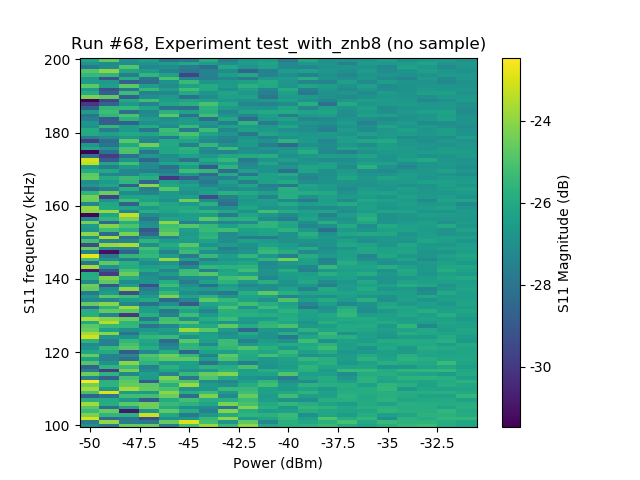

In [30]:
ax, cbax = plot_by_id(datasaver.run_id)

We can also capture db Traces for all channels in one QCoDeS measurement. Notice how start/stop number of points and number of averages can be set globally for all channels. 

In [31]:
vna.channels.start(9e3)
vna.channels.stop(8.5e9)
vna.channels.npts(100)
vna.channels.avg(100)

In [32]:
vna.rf_on()
meas = Measurement()
meas.register_parameter(vna.channels.trace)
with meas.run() as datasaver:
    get_v = vna.channels.trace.get()
    datasaver.add_result((vna.channels.trace, get_v))

Starting experimental run with id: 69


<IPython.core.display.Javascript object>


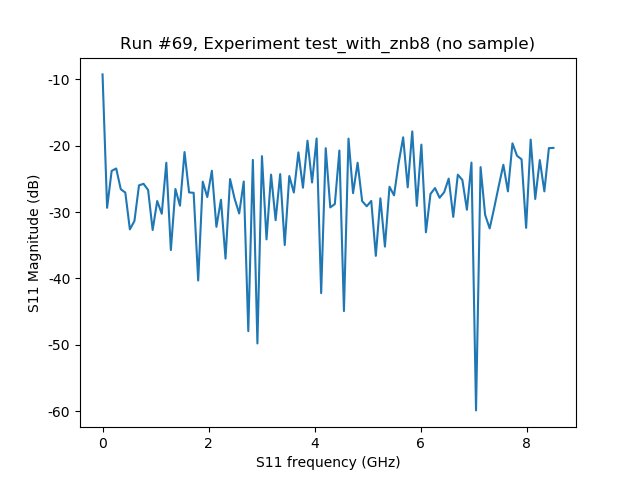

<IPython.core.display.Javascript object>


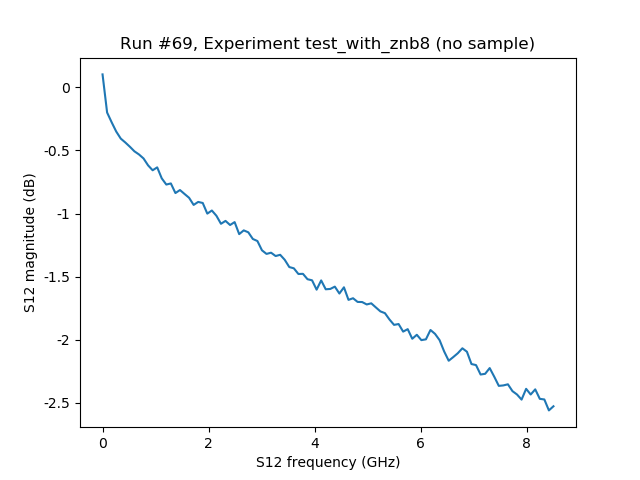

<IPython.core.display.Javascript object>


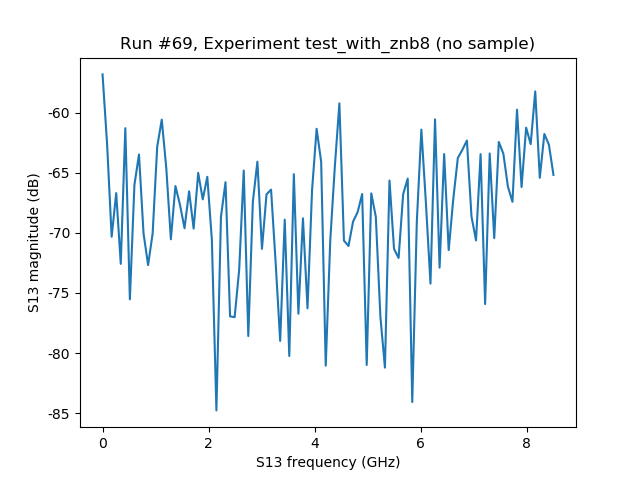

<IPython.core.display.Javascript object>


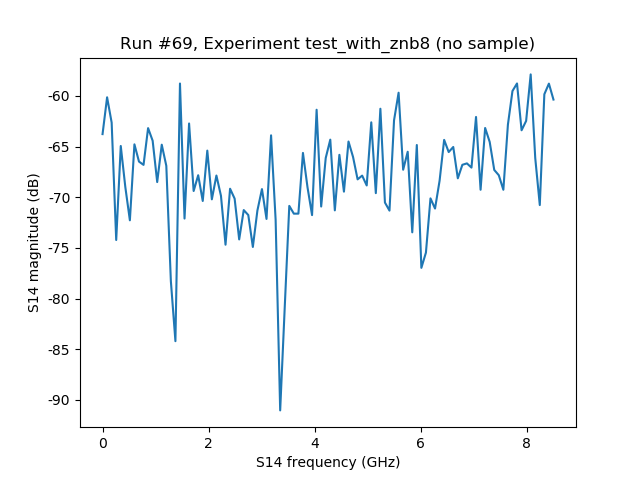

<IPython.core.display.Javascript object>


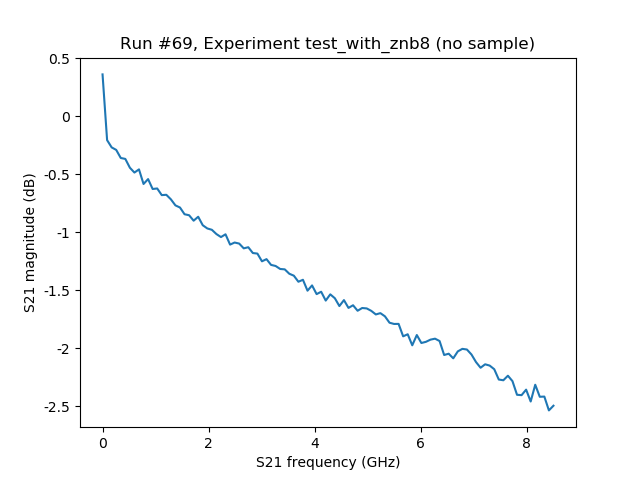

<IPython.core.display.Javascript object>


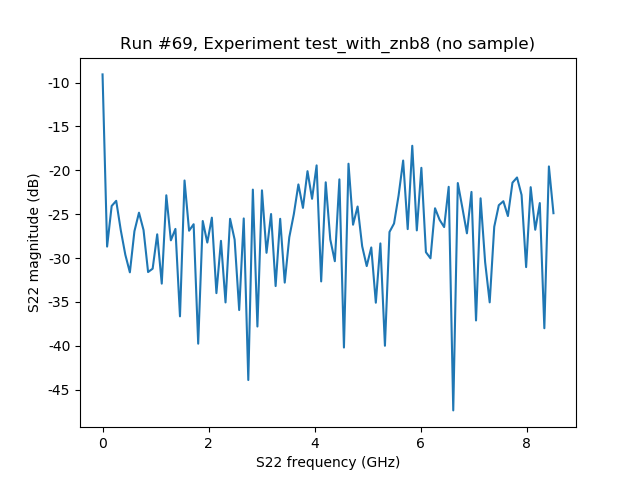

<IPython.core.display.Javascript object>


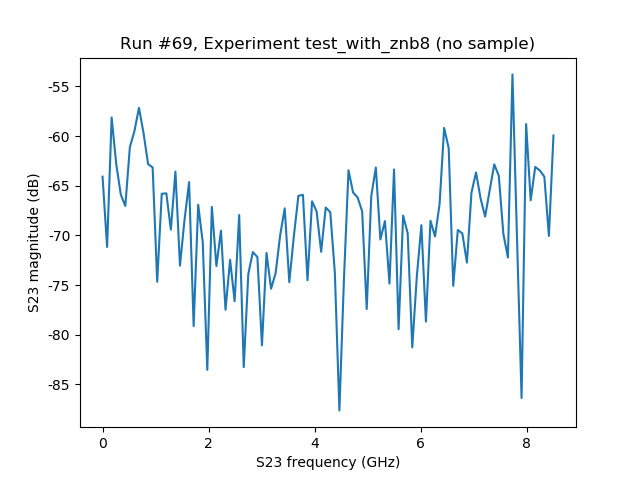

<IPython.core.display.Javascript object>


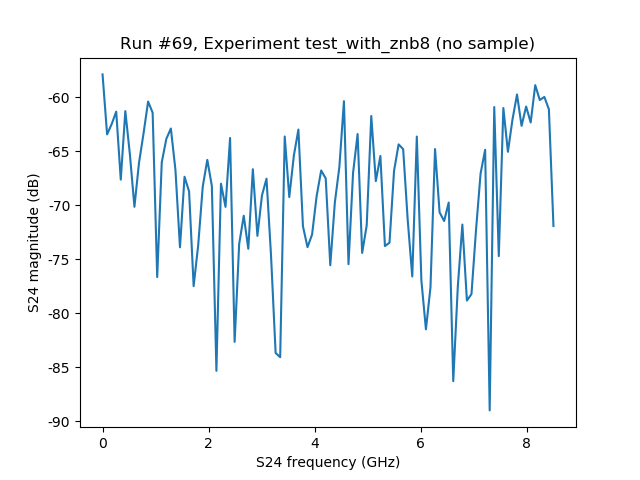

<IPython.core.display.Javascript object>


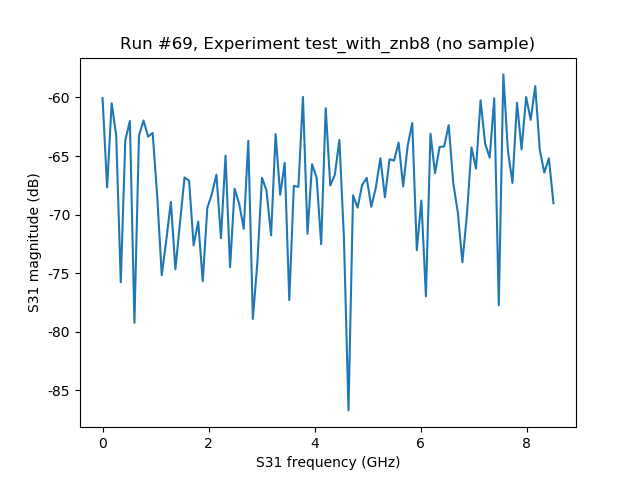

<IPython.core.display.Javascript object>


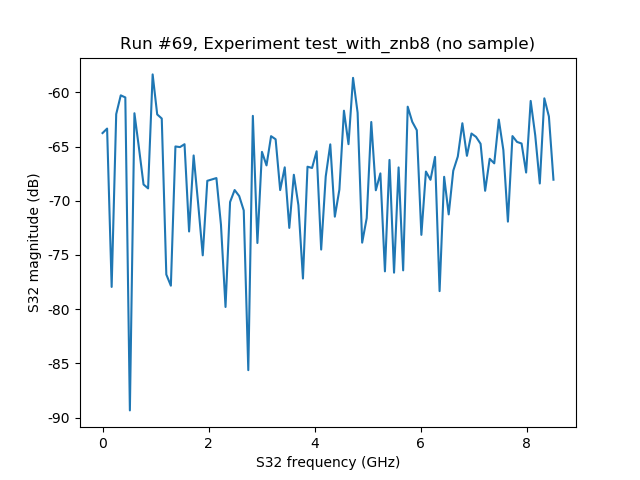

<IPython.core.display.Javascript object>


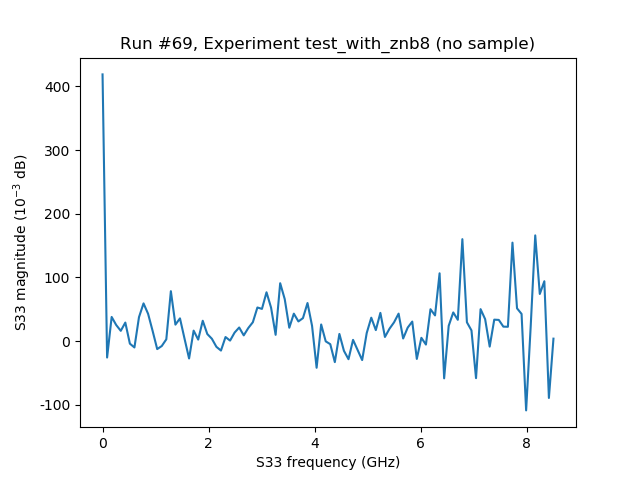

<IPython.core.display.Javascript object>


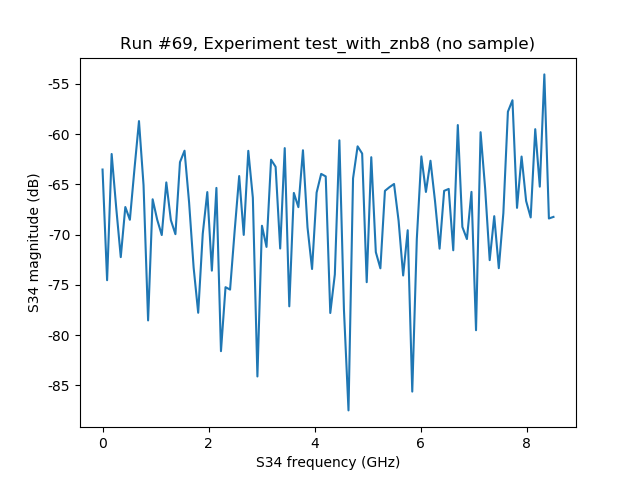

<IPython.core.display.Javascript object>


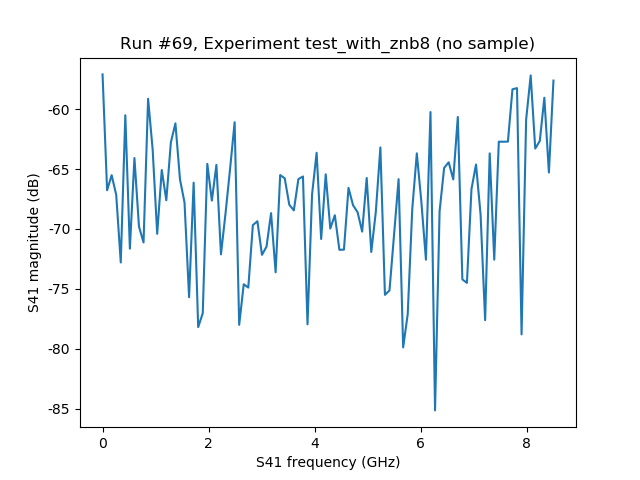

<IPython.core.display.Javascript object>


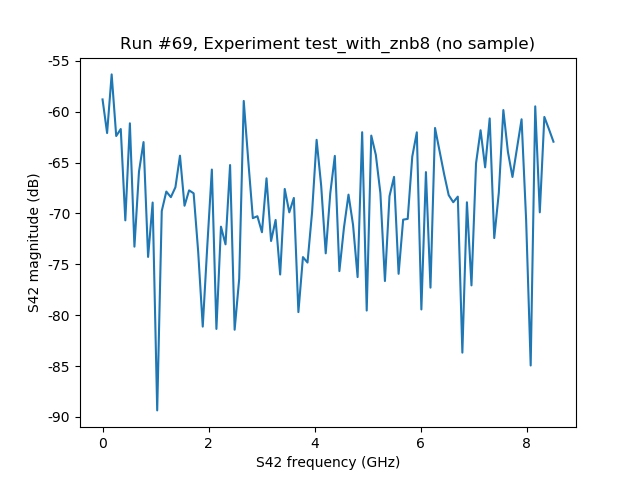

<IPython.core.display.Javascript object>


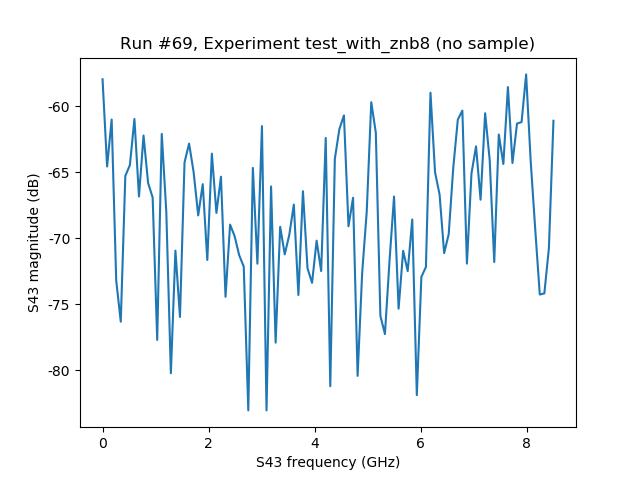

<IPython.core.display.Javascript object>


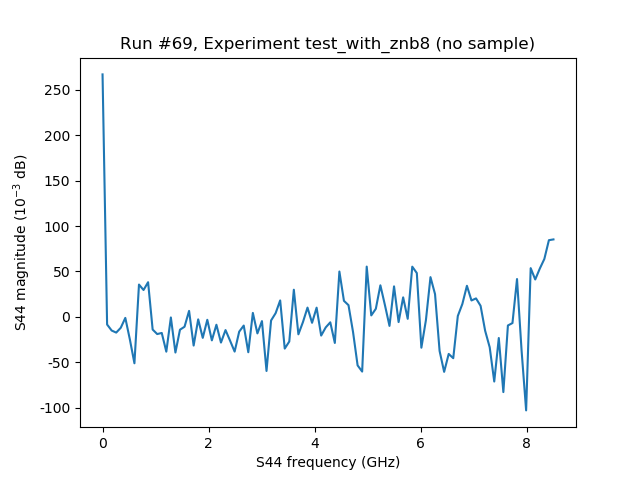

In [34]:
ax, cbax = plot_by_id(datasaver.run_id)

Slicing the channels to capture a subset is also supported, For example here we messure S11 and S12

In [35]:
vna.rf_on()
meas = Measurement()
meas.register_parameter(vna.channels[0:2].trace)
with meas.run() as datasaver:
    get_v = vna.channels[0:2].trace.get()
    datasaver.add_result((vna.channels[0:2].trace, get_v))

Starting experimental run with id: 70


<IPython.core.display.Javascript object>


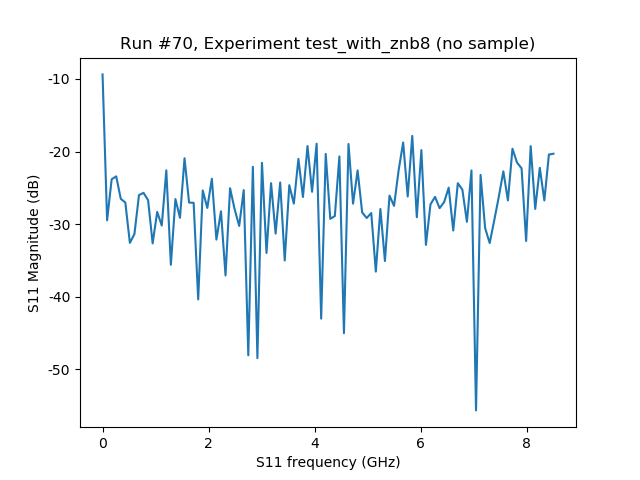

<IPython.core.display.Javascript object>


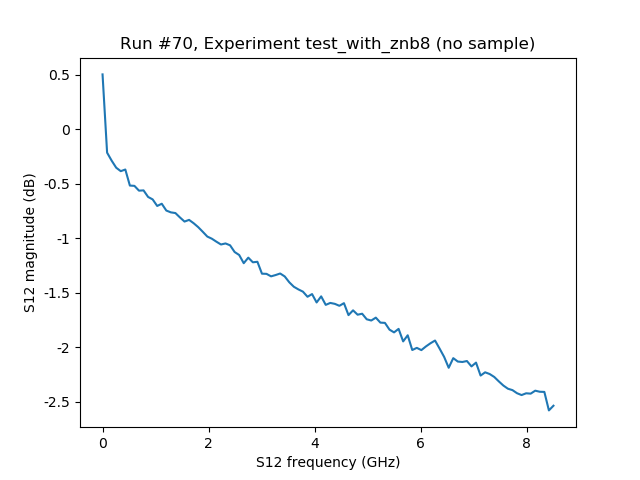

In [36]:
ax, cbax = plot_by_id(datasaver.run_id)

## Without predefined channels


It is also possible to construct a VNA without predefined channels. This is useful if you are only interested in one specific parameter.

In [37]:
vna.close()
vna = ZNB.ZNB('VNA', 'TCPIP0::192.168.15.104::inst0::INSTR', init_s_params=False)
station = qc.Station(vna)

Connected to: Rohde-Schwarz ZNB8-4Port (serial:1311601044103158, firmware:2.86) in 0.17s


Then we can add a channel, messuring with only one parameter. This speed up data acquisition.

In [38]:
vna.add_channel('S22')

In [39]:
vna.cont_meas_on()
vna.display_single_window()
vna.rf_on()

In [ ]:
meas = Measurement()
meas.register_parameter(vna.channels.S22.trace)
with meas.run() as datasaver:
    get_v = vna.channels.S22.trace.get()
    datasaver.add_result((vna.channels.S22.trace, get_v))

We can also clear the channels in an existing instrument

In [41]:
vna.clear_channels()
vna.close()

## Bind to existing channels on the VNA

It is also possible to bind to existing channels predefined on the VNA. This is likely useful if you have
configured the VNA with more complex options than the driver currently supports.

In [4]:
vna = ZNB.ZNB('VNA', 'TCPIP0::192.168.15.104::inst0::INSTR', init_s_params=False, reset_channels=False)
station = qc.Station(vna)

Connected to: Rohde-Schwarz ZNB8-4Port (serial:1311601044103158, firmware:2.86) in 0.08s


Here we bind to two existing traces defined on channel 1 of S11 and S21 respectively.

In [5]:
channel = 1
for trace_name, param_type, name in zip(['Mem3[Trc1]','Mem4[Trc2]'], ['S11', 'S21'],
                                       ['Mem3_Trc1_S11', 'Mem4_Trc2_S21']):
    chan = ZNBChannel(vna,
                      name,
                      channel,
                      vna_parameter=param_type,
                      existing_trace_to_bind_to=trace_name)
    vna.channels.append(chan)

Since we do not directly controle the shape on the acquired data we may need to update our knowlege of the shapes of the traces to acquire.

In [6]:
for channel in vna.channels:
    channel.update_traces()

Now we can acquire one

In [7]:
meas = Measurement()
meas.register_parameter(vna.channels.Mem3_Trc1_S11.trace)
with meas.run() as datasaver:
    get_v = vna.channels.Mem3_Trc1_S11.trace.get()
    datasaver.add_result((vna.channels.Mem3_Trc1_S11.trace, get_v))

Starting experimental run with id: 21


Or the other

In [8]:
meas = Measurement()
meas.register_parameter(vna.channels.Mem4_Trc2_S21.trace)
with meas.run() as datasaver:
    get_v = vna.channels.Mem4_Trc2_S21.trace.get()
    datasaver.add_result((vna.channels.Mem4_Trc2_S21.trace, get_v))

Starting experimental run with id: 22


Or both

In [9]:
meas = Measurement()
meas.register_parameter(vna.channels.trace)
with meas.run() as datasaver:
    get_v = vna.channels.trace.get()
    datasaver.add_result((vna.channels.trace, get_v))

Starting experimental run with id: 23


<IPython.core.display.Javascript object>


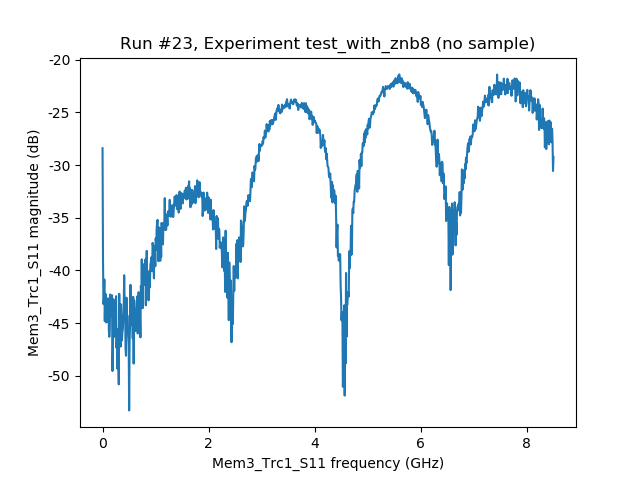

<IPython.core.display.Javascript object>


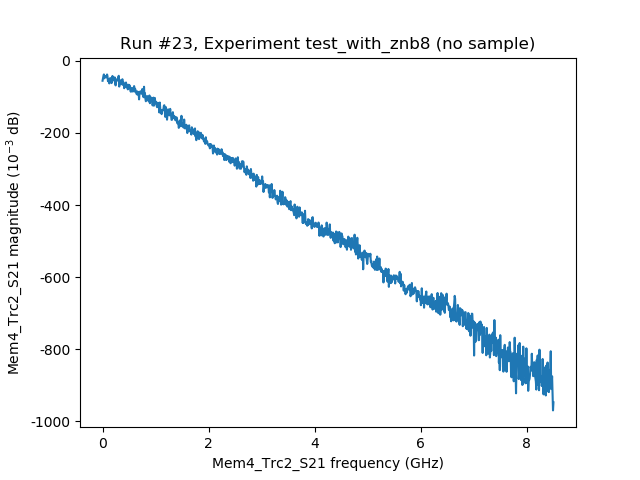

In [10]:
from qcodes.dataset.plotting import plot_by_id
ax, cbax = plot_by_id(datasaver.run_id)

## Benchmark

First lets compare capturing S11 traces with the old singe channel driver

In [42]:
vna.close()
vna = ZNB.ZNB('VNA', 'TCPIP0::192.168.15.104::inst0::INSTR', init_s_params=True)
vna.rf_on()
station = qc.Station(vna)

Connected to: Rohde-Schwarz ZNB8-4Port (serial:1311601044103158, firmware:2.86) in 0.62s


In [43]:
vna.channels.S11.print_readable_snapshot(update=True)

VNA_S11:
	parameter      value
--------------------------------------------------------------------------------
avg             :	10 
bandwidth       :	10000 (Hz)
center          :	4.2500e+09 
format          :	dB 
npts            :	201 
power           :	-10 (dBm)
span            :	8.4999e+09 
start           :	1e+05 
status          :	1 
stop            :	8.5e+09 
trace           :	Not available (dB)
trace_mag_phase :	Not available (('', 'rad'))
vna_parameter   :	S11 


Starting with a simple trace with few points and a small number of averages

In [44]:
vna.rf_on()
vna.channels.npts(10)
vna.channels.avg(1)
vna.channels.start(9e3)
vna.channels.stop(100e3)

In [45]:
%%time
a = vna.channels.S11.trace.get()

Wall time: 122 ms


Now lets try with a longer freq axis and more averages

In [46]:
vna.channels.npts(1000)
vna.channels.avg(1000)
vna.channels.start(9e3)
vna.channels.stop(8.5e9)

In [47]:
%%time
a = vna.channels.S11.trace.get()

Wall time: 2min 16s


Lets now try with only one channel added

In [48]:
vna.clear_channels()
vna.add_channel('S11')

In [49]:
vna.rf_on()
vna.channels.npts(10)
vna.channels.avg(1)
vna.channels.start(9e3)
vna.channels.stop(100e3)

In [50]:
%%time
a = vna.channels.S11.trace.get()

Wall time: 22.1 ms


As can be seen this is significantly faster than with all the channels added

In [51]:
vna.channels.npts(1000)
vna.channels.avg(1000)
vna.channels.start(9e3)
vna.channels.stop(8.5e9)

But for a long trace the relative difference is much smaller

In [52]:
%%time
b = vna.channels.S11.trace.get()

Wall time: 2min 15s


In [53]:
vna.close()